<a href="https://colab.research.google.com/github/KanVux/Spam_Email_Detection/blob/main/SpamEmailDetection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Thu thập và tiền xử lý dữ liệu**

## Thu thập dữ liệu

In [ ]:
!pip install tensorflow
!pip install transfomer
!pip install scikeras

ERROR: Could not find a version that satisfies the requirement transfomer (from versions: none)
ERROR: No matching distribution found for transfomer


In [ ]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Load file csv vào một dataframe và hiển thị các mẫu email đầu của dataset
df = pd.read_csv('/content/drive/MyDrive/NienLuan/Dataset/spam_ham_dataset.csv')
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [ ]:
# Có một cột không tên chỉ có số tăng dần -> không hữu ích -> xóa bỏ
columns_need_to_drop = ['Unnamed: 0']
df.drop(columns_need_to_drop, axis=1, inplace=True)
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# Kiểm tra có các email bị trùng nên cần được xóa
df[df.duplicated()]
# Loại bỏ các email bị trùng
df.drop_duplicates(inplace=True)

label
ham     3531
spam    1462
Name: count, dtype: int64


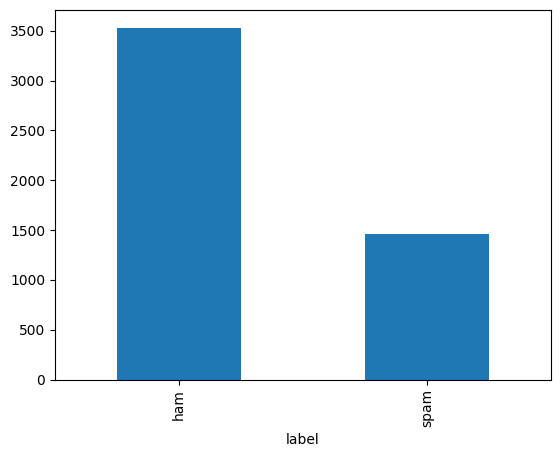

In [ ]:
# Kiểm tra số lượng email có ích (ham) và email spam
df["label"].value_counts().plot(kind="bar");
dff = df["label"].value_counts()
print(dff)

In [ ]:
# X = nội dung email (input: nội dung feed cho các model)
X = df['text']
# y = label_num (output: lớp cần được phân loại)
y = df['label_num']

print(X,y)

0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5165    Subject: fw : crosstex energy , driscoll ranch...
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: text, Length: 4993, dtype: object 0       0
1       0
2       0
3       1
4       0
       ..
5165    0
5166    0
5167    0
5169    0
5170    1
Name: label_num, Length: 4993, dtype: int64


## Tiền xử lý dữ liệu (Preprocessing)

In [ ]:
!pip install nltk

In [ ]:
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Tải dữ liệu NLTK cần thiết
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

# Lấy các từ dừng (stopwords) trong tiếng Anh
stop_word = set(stopwords.words('english'))

# Khai báo bổ đề ngôn ngữ
lemmatizer = WordNetLemmatizer()

# Loại bỏ các chữ cái lặp lại liên tiếp trong từ
def remove_duplicate_letters(text):
    """Loại bỏ các chữ cái lặp lại liên tiếp trong một từ."""
    if not text:
        return ""
    result = text[0]
    for char in text[1:]:
        if char != result[-1]:
            result += char
    return result

# Tiền xử lý dữ liệu
def preprocess_text(text):
    """Tiền xử lý chuỗi văn bản."""
    # Đổi toàn bộ chữ thành chữ thường
    text = text.lower()
    # Loại bỏ các dấu câu và ký tự đặc biệt
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)
    # Loại bỏ khoảng trắng thừa
    text = re.sub(r'\s+', ' ', text)
    # Loại bỏ các ký tự số
    text = re.sub(r'\d+', '', text)
    # Áp dụng hàm loại bỏ chữ cái lặp lại
    text = ' '.join([remove_duplicate_letters(word) for word in text.split()])
    # Tokenize từ và loại bỏ các từ dừng (stopwords)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stop_word]
    # Chuyển các từ về dạng nguyên bản (lemmatize)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Trả về chuỗi đã tiền xử lý
    return ' '.join(tokens)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['cleaned_text'] = df['text'].apply(preprocess_text)
df.head()

,label,text,label_num,cleaned_text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter folow note gave m...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom january se atached file hplnol...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho around wonderful...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop window ofice cheap main tren...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject indian spring deal bok teco pvr revenu...


# **Trích xuất đặt trưng**

In [ ]:
from gensim.models import Word2Vec
# Tách các Câu từ email đã được xử lý
sentences = [text.split() for text in df['cleaned_text']]
# Sử dụng Word2Vec để biến các Từ thành các Vector (100 chiều) sử dụng CBOW (sg=0)
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Hàm chuyển email thành vector
def get_email_vector(email, model):
    words = email.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if len(word_vectors) > 0:
        return np.mean(word_vectors, axis=0)
    else:
        print(f"Warning: Email '{email}' has no words in the Word2Vec vocabulary.")
        return np.zeros(model.vector_size)

# Biến đổi dữ liệu
X = np.array([get_email_vector(email, word2vec_model) for email in df['cleaned_text']])
y = df['label_num']

# Lưu mô hình Word2Vec
word2vec_model.save("/content/drive/MyDrive/NienLuan/Models/word2vec_model.keras")



## Chia dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3994, 100), (999, 100), (3994,), (999,))

## SMOTE

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit và transform trên tập huấn luyện
X_test = scaler.transform(X_test)       # Chỉ transform trên tập kiểm tra

# Áp dụng SMOTE
smote = SMOTE(random_state=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Kiểm tra kết quả sau SMOTE
print(f"Số lượng mẫu trước SMOTE: {len(X_train)}")
print(f"Phân phối nhãn trước SMOTE: {dict(zip(*np.unique(y_train, return_counts=True)))}")
print(f"Số lượng mẫu sau SMOTE: {len(X_train_resampled)}")
print(f"Phân phối nhãn sau SMOTE: {dict(zip(*np.unique(y_train_resampled, return_counts=True)))}")


Số lượng mẫu trước SMOTE: 3994
Phân phối nhãn trước SMOTE: {0: 2834, 1: 1160}
Số lượng mẫu sau SMOTE: 5668
Phân phối nhãn sau SMOTE: {0: 2834, 1: 2834}


# Model Training

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,roc_curve,f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

## RNN

In [ ]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization

In [ ]:
# Reshape dữ liệu cho phù hợp với RNN
X_train_resampled_for_RNN = X_train_resampled.reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
# Handle OOV words by replacing them with a valid index (e.g., 0)
X_train_resampled[X_train_resampled < 0] = 0
X_test[X_test < 0] = 0


def create_rnn_model(lstm_units, dropout_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=len(word2vec_model.wv.key_to_index), output_dim=100),
        tf.keras.layers.LSTM(units=int(lstm_units)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def rnn_evaluation(lstm_units, dropout_rate,batch_size,epochs):
    model = create_rnn_model(lstm_units, dropout_rate)
    batch_size = int(batch_size)
    epochs = int(epochs)
    model.fit(X_train_resampled, y_train_resampled, epochs, batch_size)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


pbounds = {
    'lstm_units': (32, 128),
    'dropout_rate': (0, 0.5),
    'batch_size': (16, 64),
    'epochs': (10, 50),
}

optimizer = BayesianOptimization(
    f=rnn_evaluation,
    pbounds=pbounds,
    random_state=1,
)

optimizer.maximize(init_points=5, n_iter=10)

best_params = optimizer.max['params']
print("Best hyperparameters:", best_params)

best_params['batch_size'] = int(best_params['batch_size'])
best_params['epochs'] = int(best_params['epochs'])

best_rnn_model = create_rnn_model(best_params['lstm_units'], best_params['dropout_rate'])
rnn_history = best_rnn_model.fit(X_train_resampled, y_train_resampled, epochs=best_params['epochs'],
                                 batch_size=best_params['batch_size'],
                                 validation_data=(X_test, y_test),verbose=1)

best_rnn_model = create_rnn_model(best_params['lstm_units'], best_params['dropout_rate'])
rnn_history = best_rnn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test),verbose=1)

rnn_loss, rnn_accuracy = best_rnn_model.evaluate(X_test, y_test, verbose=0)
print('RNN Loss:', rnn_loss)
print('RNN Accuracy:', rnn_accuracy)

rnn_y_pred = (best_rnn_model.predict(X_test) > 0.5).astype("int32")

rnn_cm = confusion_matrix(y_test, rnn_y_pred)
print("RNN Confusion Matrix:\n", rnn_cm)

print(classification_report(y_test, rnn_y_pred))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('RNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('RNN Loss')
plt.show()

best_rnn_model.save("/content/drive/MyDrive/NienLuan/Models/rnn_model_bayes.keras")

NameError: name 'BayesianOptimization' is not defined

## RNN Model 2

In [ ]:
# RNN Model sử dụng Bayesian Optimization để hyperparameter tuning

def create_rnn_model(lstm_units, dropout_rate):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(input_dim=len(word2vec_model.wv.key_to_index), output_dim=100),
        tf.keras.layers.LSTM(units=int(lstm_units)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


def rnn_evaluation(lstm_units, dropout_rate,batch_size):
    model = create_rnn_model(lstm_units, dropout_rate)
    batch_size = int(batch_size)
    model.fit(X_train_resampled, y_train_resampled, 5, batch_size)
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


# Định nghĩa các hyperparameters cần được tune
pbounds = {
    'lstm_units': (32, 128),
    'dropout_rate': (0, 0.5),
    'batch_size': (32, 64),
}

# tạo một BayesianOptimization object
optimizer = BayesianOptimization(
    f=rnn_evaluation,
    pbounds=pbounds,
    random_state=1,
)

# Tối ưu các hyperparameters
optimizer.maximize(init_points=5, n_iter=10)

# lấy các hyperparameters tốt nhất
best_params = optimizer.max['params']
print("Best hyperparameters:", best_params)

# Chuyển batch_size và epochs về dạng int cho model sử dụng
best_params['batch_size'] = int(best_params['batch_size'])
best_params['epochs'] = int(best_params['epochs'])

# Train the RNN model with the best hyperparameters
best_rnn_model = create_rnn_model(best_params['lstm_units'], best_params['dropout_rate'])
rnn_history = best_rnn_model.fit(X_train_resampled, y_train_resampled, 20,
                                 validation_data=(X_test, y_test),verbose=1)

print(best_rnn_model.summary());
# Evaluate the Model
rnn_loss, rnn_accuracy = best_rnn_model.evaluate(X_test, y_test, verbose=0)
print('RNN Loss:', rnn_loss)
print('RNN Accuracy:', rnn_accuracy)

# Predict on Test Set
rnn_y_pred = (best_rnn_model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
rnn_cm = confusion_matrix(y_test, rnn_y_pred)
print("RNN Confusion Matrix:\n", rnn_cm)

# Classification Report
print(classification_report(y_test, rnn_y_pred))

# Plot Accuracy and Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(rnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('RNN Accuracy')

plt.subplot(1, 2, 2)
plt.plot(rnn_history.history['loss'], label='Train Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('RNN Loss')
plt.show()

# Save Model
best_rnn_model.save("/content/drive/MyDrive/NienLuan/Models/rnn_model_bayes.keras")

NameError: name 'BayesianOptimization' is not defined

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


178/178 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.6605 - loss: 0.5739 - val_accuracy: 0.8669 - val_loss: 0.3156
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 108ms/step - accuracy: 0.8659 - loss: 0.3097 - val_accuracy: 0.8709 - val_loss: 0.3173
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 110ms/step - accuracy: 0.8794 - loss: 0.2842 - val_accuracy: 0.8819 - val_loss: 0.2856
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 111ms/step - accuracy: 0.8781 - loss: 0.2901 - val_accuracy: 0.8679 - val_loss: 0.3028
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 18s 104ms/step - accuracy: 0.8882 - loss: 0.2690 - val_accuracy: 0.8739 - val_loss: 0.2872
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.8885 - loss: 0.2539 - val_accuracy: 0.8819 - val_loss: 0.2671
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 19s 105ms/step - accuracy: 0.8850 - loss: 0.2528 - val_accuracy: 0.9039 - val_loss: 0.2484
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9007 - loss: 0.2392 - val

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (None, 100, 100)            │       4,224,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          42,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,799,517 (48.83 MB)

 Trainable params: 4,266,505 (16.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,533,012 (32.55 MB)

LSTM Loss: 0.2608086168766022
LSTM Accuracy: 0.8748748898506165
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
LSTM Confusion Matrix:
 [[602  95]
 [ 30 272]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.91       697
           1       0.74      0.90      0.81       302

    accuracy                           0.87       999
   macro avg       0.85      0.88      0.86       999
weighted avg       0.89      0.87      0.88       999



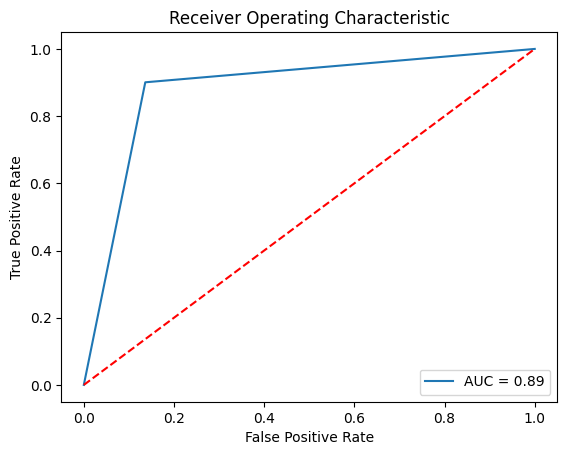

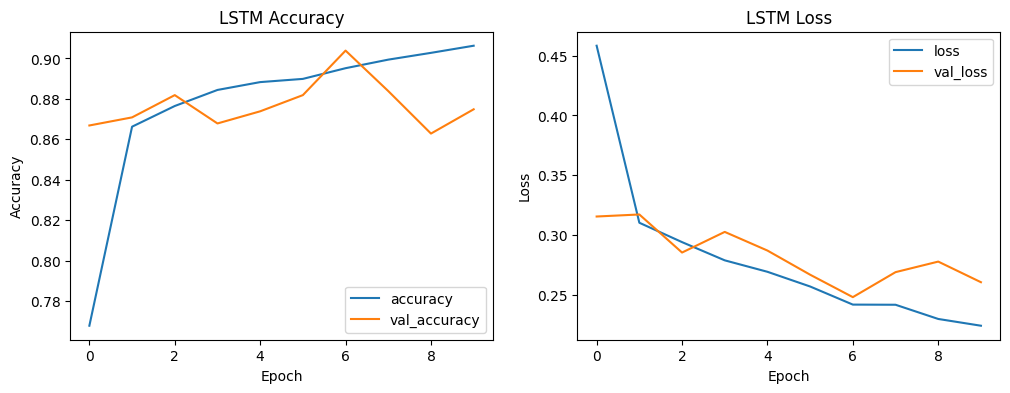

In [ ]:
# Xây dựng mô hình LSTM
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=len(word2vec_model.wv.key_to_index), output_dim=100, input_length=X_train_resampled.shape[1]),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
lstm_history = lstm_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# In model summary
lstm_model.summary()
# Đánh giá mô hình
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test, verbose=0)
print('LSTM Loss:', lstm_loss)
print('LSTM Accuracy:', lstm_accuracy)

# Dự đoán trên tập kiểm tra
lstm_y_pred = (lstm_model.predict(X_test) > 0.5).astype("int32")

# Tính toán ma trận confusion
lstm_cm = confusion_matrix(y_test, lstm_y_pred)
print("LSTM Confusion Matrix:\n", lstm_cm)

# Tính toán precision, recall, f1-score
print(classification_report(y_test, lstm_y_pred))

fpr, tpr, thresholds = roc_curve(y_test, lstm_y_pred)
plt.plot(fpr, tpr, label='AUC = %0.2f' % auc_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Vẽ đồ thị accuracy và loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('LSTM Accuracy')

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='loss')
plt.plot(lstm_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('LSTM Loss')
plt.show()

# Lưu model
lstm_model.save("/content/drive/MyDrive/NienLuan/Models/lstm_model.keras")